In [1]:
# Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
CarClaim = pd.read_csv(r"D:\final_data.csv", header=0)

CarClaim_bk = CarClaim.copy()

CarClaim.head()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Manufacturer,RTO City,Policy Type,Marital Status,OCCUPATION,CITY,Facility Name,Ageny Num,Surveyor,Type Of Payment,Geography,IDV Value,Claim Element,Claim Created Date,Claim Status
0,2,7.0,9,66,80,Day-Shelton,Lake Johnview,Our own renewals,NOT KNOWN,Insurance broker,Stephanieview,Shaw and Sons,4089194,James Hunt,NaN,East Terri,274920.0,PARTIAL LOSS,2/22/2019 20:52,Rejected
1,3,6.0,7,87,84,Dennis LLC,Heidiburgh,NCB Transfer,NOT KNOWN,Pharmacologist,Juanberg,Jones PLC,58746732,Jason Jones,REIMBURSEMENT,Timothymouth,283000.0,NET OF SALVAGE,10/21/2018 8:20,Rejected
2,9,6.0,2,53,51,"Smith, Waters and Adams",East Linda,Our own renewals,NOT KNOWN,"Engineer, maintenance",Port Rachel,Campbell-Greene,88078634,Michael Zuniga,NaN,Sarahborough,283000.0,OWNER DRIVER:BODY INJURY,1/16/2019 7:45,Rejected
3,9,6.0,7,47,95,"Pierce, Smith and Reynolds",Newtonfurt,MTHF Renewal,NOT KNOWN,Electrical engineer,North Michaelburgh,"Banks, Collins and Miller",51769445,Kimberly Paul,NaN,Tammyland,260040.0,OWNER DRIVER:DEATH,12/14/2018 1:15,Rejected
4,6,3.0,2,99,58,Phillips PLC,Michaelburgh,Our own renewals,NOT KNOWN,Medical sales representative,Margaretfurt,Perkins-Manning,68919640,Carol Lane,CASHLESS,Port Christine,318840.0,OWNER DRIVER:DEATH,12/3/2018 4:11,Accepted


In [3]:
CarClaim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Break In Period             5000 non-null   int64  
 1   Car Age Inception           4995 non-null   float64
 2   Claim Freq                  5000 non-null   int64  
 3   Claim loss_reported_period  5000 non-null   int64  
 4   Claim occ_cycle             5000 non-null   int64  
 5   Manufacturer                5000 non-null   object 
 6   RTO City                    5000 non-null   object 
 7   Policy Type                 5000 non-null   object 
 8   Marital Status              5000 non-null   object 
 9   OCCUPATION                  5000 non-null   object 
 10  CITY                        5000 non-null   object 
 11  Facility Name               5000 non-null   object 
 12  Ageny Num                   5000 non-null   int64  
 13  Surveyor                    5000 

In [4]:
CarClaim=CarClaim.rename(columns={'Claim Status':'ClaimStatus'},inplace=False)

CarClaim_bk2=CarClaim.copy()

CarClaim.head()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Manufacturer,RTO City,Policy Type,Marital Status,OCCUPATION,CITY,Facility Name,Ageny Num,Surveyor,Type Of Payment,Geography,IDV Value,Claim Element,Claim Created Date,ClaimStatus
0,2,7.0,9,66,80,Day-Shelton,Lake Johnview,Our own renewals,NOT KNOWN,Insurance broker,Stephanieview,Shaw and Sons,4089194,James Hunt,NaN,East Terri,274920.0,PARTIAL LOSS,2/22/2019 20:52,Rejected
1,3,6.0,7,87,84,Dennis LLC,Heidiburgh,NCB Transfer,NOT KNOWN,Pharmacologist,Juanberg,Jones PLC,58746732,Jason Jones,REIMBURSEMENT,Timothymouth,283000.0,NET OF SALVAGE,10/21/2018 8:20,Rejected
2,9,6.0,2,53,51,"Smith, Waters and Adams",East Linda,Our own renewals,NOT KNOWN,"Engineer, maintenance",Port Rachel,Campbell-Greene,88078634,Michael Zuniga,NaN,Sarahborough,283000.0,OWNER DRIVER:BODY INJURY,1/16/2019 7:45,Rejected
3,9,6.0,7,47,95,"Pierce, Smith and Reynolds",Newtonfurt,MTHF Renewal,NOT KNOWN,Electrical engineer,North Michaelburgh,"Banks, Collins and Miller",51769445,Kimberly Paul,NaN,Tammyland,260040.0,OWNER DRIVER:DEATH,12/14/2018 1:15,Rejected
4,6,3.0,2,99,58,Phillips PLC,Michaelburgh,Our own renewals,NOT KNOWN,Medical sales representative,Margaretfurt,Perkins-Manning,68919640,Carol Lane,CASHLESS,Port Christine,318840.0,OWNER DRIVER:DEATH,12/3/2018 4:11,Accepted


In [5]:
Target_count=CarClaim.ClaimStatus.value_counts()
print('Class 0:', Target_count[0])
print('Class 1:', Target_count[1])
print('Proportion:', round(Target_count[0] / Target_count[1], 2), ': 1')
print('Total Claims Trans:', len(CarClaim))

Class 0: 2504
Class 1: 2496
Proportion: 1.0 : 1
Total Claims Trans: 5000


In [6]:
CarClaim_dup = CarClaim[CarClaim.duplicated(keep='last')]
CarClaim_dup

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Manufacturer,RTO City,Policy Type,Marital Status,OCCUPATION,CITY,Facility Name,Ageny Num,Surveyor,Type Of Payment,Geography,IDV Value,Claim Element,Claim Created Date,ClaimStatus


In [7]:
CarClaim.duplicated().any()

False

In [8]:
CarClaim.isnull().sum()

Break In Period                  0
Car Age Inception                5
Claim Freq                       0
Claim loss_reported_period       0
Claim occ_cycle                  0
Manufacturer                     0
RTO City                         0
Policy Type                      0
Marital Status                   0
OCCUPATION                       0
CITY                             0
Facility Name                    0
Ageny Num                        0
Surveyor                         0
Type Of Payment               1351
Geography                        0
IDV Value                        5
Claim Element                    0
Claim Created Date               0
ClaimStatus                      0
dtype: int64

In [9]:
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

imputer_str = SimpleImputer(missing_values=np.nan, strategy='most_frequent', fill_value=None, verbose=0,
                            copy=True, add_indicator=False)

imputer_int = KNNImputer(missing_values=np.nan, n_neighbors=5, weights='uniform', metric='nan_euclidean',
                         copy=True, add_indicator=False)

for col in CarClaim.columns:
    if CarClaim[col].dtype == 'object':
        CarClaim[col] = imputer_str.fit_transform(CarClaim[col].values.reshape(-1,1))[:,0]
    elif CarClaim[col].dtypes == 'float':
        CarClaim[col] = imputer_int.fit_transform(CarClaim[col].values.reshape(-1,1))[:,0]

In [10]:
CarClaim.isnull().sum()

Break In Period               0
Car Age Inception             0
Claim Freq                    0
Claim loss_reported_period    0
Claim occ_cycle               0
Manufacturer                  0
RTO City                      0
Policy Type                   0
Marital Status                0
OCCUPATION                    0
CITY                          0
Facility Name                 0
Ageny Num                     0
Surveyor                      0
Type Of Payment               0
Geography                     0
IDV Value                     0
Claim Element                 0
Claim Created Date            0
ClaimStatus                   0
dtype: int64

In [11]:
# Use LabelEncoder to handle categorical data

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in CarClaim.columns:
    if CarClaim[col].dtypes=='object':
        CarClaim[col]=LE.fit_transform(CarClaim[col])

In [27]:
# Identify the independent and Target (dependent) variables

IndepVar = []
for col in CarClaim.columns:
    if col != 'ClaimStatus':
        IndepVar.append(col)

TargetVar = 'ClaimStatus'

x = CarClaim[IndepVar]
y = CarClaim[TargetVar]
CarClaim

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Policy Type,OCCUPATION,Facility Name,Surveyor,Type Of Payment,IDV Value,Claim Element,ClaimStatus
0,2,7,9,66,80,2,320,3708,1832,1,274920,3,0
1,3,6,7,87,84,0,433,2000,1936,2,283000,0,0
2,9,6,2,53,51,2,211,554,3369,1,283000,1,0
3,9,6,7,47,95,3,189,192,2742,1,260040,2,0
4,6,3,2,99,58,2,373,3129,729,1,318840,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,3,8,1,49,3,375,3343,892,1,1750000,2,1
4996,9,5,6,96,48,2,263,3702,1925,1,360000,2,1
4997,5,2,2,19,57,0,162,111,2346,1,784910,3,1
4998,3,2,3,98,1,3,102,2588,2843,1,507800,3,1


In [13]:
CarClaim.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Manufacturer',
       'RTO City', 'Policy Type', 'Marital Status', 'OCCUPATION', 'CITY',
       'Facility Name', 'Ageny Num', 'Surveyor', 'Type Of Payment',
       'Geography', 'IDV Value', 'Claim Element', 'Claim Created Date',
       'ClaimStatus'],
      dtype='object')

In [14]:
CarClaim = CarClaim.drop(['Manufacturer', 'Marital Status', 'Geography', 'CITY', 'Ageny Num', 'RTO City', 'Claim Created Date'], axis=1)

In [15]:
CarClaim.head()

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Policy Type,OCCUPATION,Facility Name,Surveyor,Type Of Payment,IDV Value,Claim Element,ClaimStatus
0,2,7.0,9,66,80,2,320,3708,1832,1,274920.0,3,0
1,3,6.0,7,87,84,0,433,2000,1936,2,283000.0,0,0
2,9,6.0,2,53,51,2,211,554,3369,1,283000.0,1,0
3,9,6.0,7,47,95,3,189,192,2742,1,260040.0,2,0
4,6,3.0,2,99,58,2,373,3129,729,1,318840.0,2,1


In [16]:
CarClaim.columns

Index(['Break In Period', 'Car Age Inception', 'Claim Freq',
       'Claim loss_reported_period', 'Claim occ_cycle', 'Policy Type',
       'OCCUPATION', 'Facility Name', 'Surveyor', 'Type Of Payment',
       'IDV Value', 'Claim Element', 'ClaimStatus'],
      dtype='object')

In [17]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

#X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.2,stratify=y,random_state=42)

# Display the shape of train and test data 

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 19), (1500, 19), (3500,), (1500,))

In [18]:
def convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return 0

# Convert all string values to integers
CarClaim = CarClaim.applymap(convert_to_int)

print(CarClaim)

      Break In Period  Car Age Inception  Claim Freq  \
0                   2                  7           9   
1                   3                  6           7   
2                   9                  6           2   
3                   9                  6           7   
4                   6                  3           2   
...               ...                ...         ...   
4995                1                  3           8   
4996                9                  5           6   
4997                5                  2           2   
4998                3                  2           3   
4999                0                  1           3   

      Claim loss_reported_period  Claim occ_cycle  Policy Type  OCCUPATION  \
0                             66               80            2         320   
1                             87               84            0         433   
2                             53               51            2         211   
3              

In [19]:
#Normalize

mm_cols = ['Break In Period', 'Car Age Inception', 'Claim Freq', 'Claim loss_reported_period', 'Claim occ_cycle',  'OCCUPATION', 'Facility Name', 'Surveyor', 'Type Of Payment', 'IDV Value', 'Claim Element']

In [20]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

Confusion matrix : 
 [[346 419]
 [320 415]]
Outcome values : 
 346 419 320 415
Classification report : 
               precision    recall  f1-score   support

           1       0.52      0.45      0.48       765
           0       0.50      0.56      0.53       735

    accuracy                           0.51      1500
   macro avg       0.51      0.51      0.51      1500
weighted avg       0.51      0.51      0.51      1500

Accuracy : 50.7 %
Precision : 52.0 %
Recall : 45.2 %
F1 Score : 0.484
Specificity or True Negative Rate : 56.5 %
Balanced Accuracy : 50.8 %
MCC : 0.017
roc_auc_score: 0.508


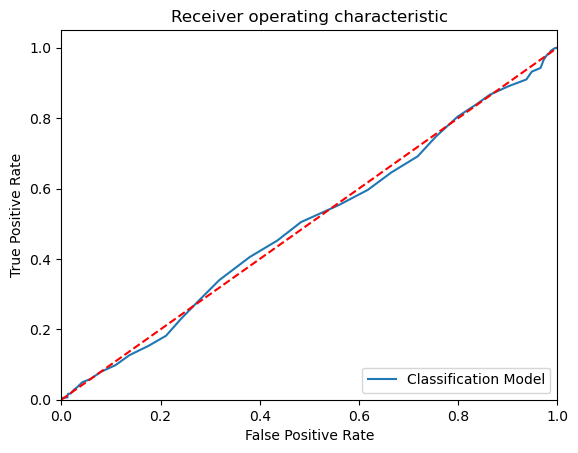

-----------------------------------------------------------------------------------------------------


In [21]:
# To build the 'Random Forest' model with random sampling

from sklearn.ensemble import RandomForestClassifier

# Create model object

ModelRF = RandomForestClassifier()
#ModelRF = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2,
#                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt',
#                                 max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False,
#                                 n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None,
#                                 ccp_alpha=0.0, max_samples=None)

# Train the model with train data

ModelRF.fit(x_train,y_train)

# Predict the model with test data set

y_pred = ModelRF.predict(x_test)
y_pred_prob = ModelRF.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#--------------------------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()
print('-----------------------------------------------------------------------------------------------------')

In [22]:
# Results

PredResults = pd.DataFrame({'ClaimStatus_A':y_test, 'ClaimStatus_P':y_pred})

# Merge two Dataframes on index of both the dataframes

TestDataResults = CarClaim_bk2.merge(PredResults, left_index=True, right_index=True)

# Display the 10 records randomly

TestDataResults.sample(5)

,Break In Period,Car Age Inception,Claim Freq,Claim loss_reported_period,Claim occ_cycle,Manufacturer,RTO City,Policy Type,Marital Status,OCCUPATION,CITY,Facility Name,Ageny Num,Surveyor,Type Of Payment,Geography,IDV Value,Claim Element,Claim Created Date,ClaimStatus,ClaimStatus_A,ClaimStatus_P
1033,7,1.0,9,77,44,"Santos, Baker and Blair",Lake James,Our own renewals,NOT KNOWN,Consulting civil engineer,Shawnside,Quinn and Sons,51987983,Michael Murphy,NaN,Sharonview,2522000.0,NET OF SALVAGE,3/28/2019 3:15,Accepted,1,1
2605,3,0.0,2,35,72,Reyes PLC,Lindafort,MTHF Renewal,NOT KNOWN,TEFL teacher,Kelseyberg,Paul-Brown,46101492,William Fletcher,CASHLESS,Lake Ericaburgh,725941.0,OWNER DRIVER:DEATH,2/17/2019 16:20,Rejected,0,0
247,5,1.0,8,1,76,Dyer-Schneider,Williamsmouth,NCB Transfer,NOT KNOWN,Lobbyist,Lake Derek,Browning LLC,64636306,Ryan Baker,CASHLESS,Shawland,706597.0,OWNER DRIVER:BODY INJURY,12/5/2018 14:15,Accepted,1,0
724,7,0.0,0,33,16,"Shepard, Gray and Stewart",Matthewhaven,Our own renewals,NOT KNOWN,Diagnostic radiographer,Taraville,Hoffman PLC,1889775,Margaret Lee,CASHLESS,Garyview,1015554.0,OWNER DRIVER:DEATH,11/5/2018 11:58,Rejected,0,1
3646,8,6.0,9,20,52,Brewer LLC,Ericville,MTHF Renewal,NOT KNOWN,Licensed conveyancer,West Stephanieland,"Garcia, Williams and Bryant",59892651,Robert Marshall,CASHLESS,Cookeville,510000.0,PARTIAL LOSS,2/3/2019 23:10,Accepted,1,0


In [23]:
RGRResults = pd.read_csv(r"D:\RGRResults.csv", header=0)
RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


Model Name:  LogisticRegression()
Confusion matrix : 
 [[346 419]
 [340 395]]
Outcome values : 
 346 419 340 395
Classification report : 
               precision    recall  f1-score   support

           1       0.50      0.45      0.48       765
           0       0.49      0.54      0.51       735

    accuracy                           0.49      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.50      0.49      0.49      1500

Accuracy : 49.4 %
Precision : 50.4 %
Recall : 45.2 %
F1 Score : 0.477
Specificity or True Negative Rate : 53.7 %
Balanced Accuracy : 49.5 %
MCC : -0.01
roc_auc_score: 0.495


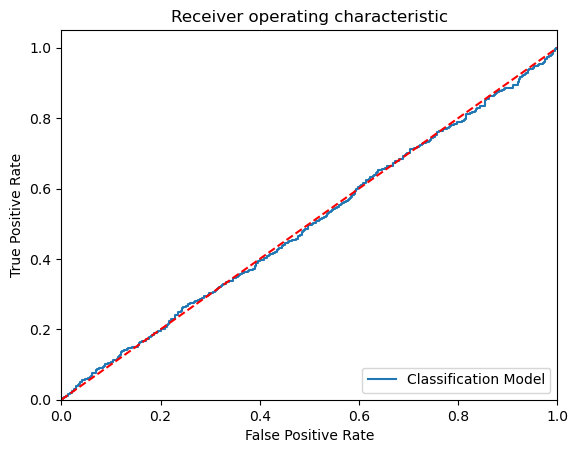

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[407 358]
 [360 375]]
Outcome values : 
 407 358 360 375
Classification report : 
               precision    recall  f1-score   support

           1       0.53      0.53      0.53       765
           0       0.51      0.51      0.51       735

    accuracy                           0.52      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.52      0.52      0.52      1500

Accuracy : 52.1 %
Precision : 53.1 %
Recall : 53.2 %
F1 Score : 0.531
Specificity or True Negative Rate : 51.0 %
Balanced Accuracy : 52.1 %
MCC : 0.042
roc_auc_score: 0.521


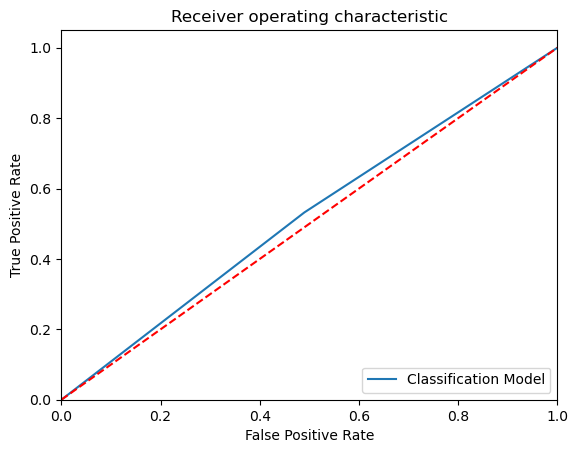

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[338 427]
 [326 409]]
Outcome values : 
 338 427 326 409
Classification report : 
               precision    recall  f1-score   support

           1       0.51      0.44      0.47       765
           0       0.49      0.56      0.52       735

    accuracy                           0.50      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.50      0.50      0.50      1500

Accuracy : 49.8 %
Precision : 50.9 %
Recall : 44.2 %
F1 Score : 0.473
Specificity or True Negative Rate : 55.6 %
Balanced Accuracy : 49.9 %
MCC : -0.002
roc_auc_score: 0.499


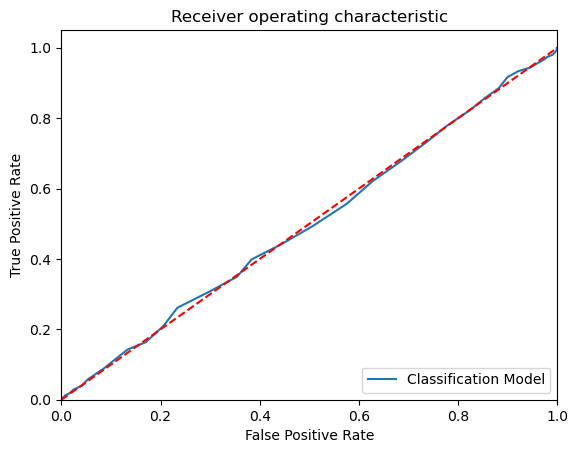

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[363 402]
 [313 422]]
Outcome values : 
 363 402 313 422
Classification report : 
               precision    recall  f1-score   support

           1       0.54      0.47      0.50       765
           0       0.51      0.57      0.54       735

    accuracy                           0.52      1500
   macro avg       0.52      0.52      0.52      1500
weighted avg       0.52      0.52      0.52      1500

Accuracy : 52.3 %
Precision : 53.7 %
Recall : 47.5 %
F1 Score : 0.504
Specificity or True Negative Rate : 57.4 %
Balanced Accuracy : 52.4 %
MCC : 0.049
roc_auc_score: 0.524


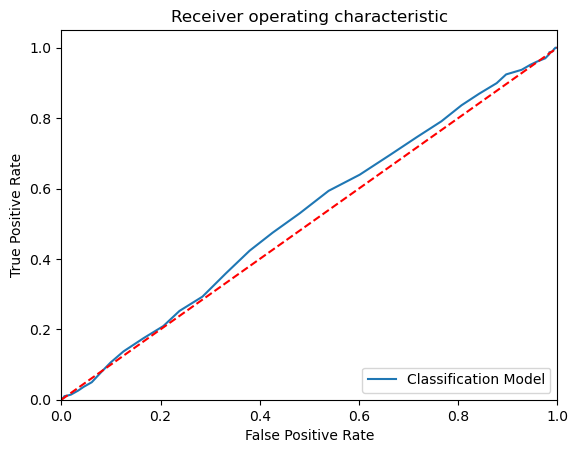

-----------------------------------------------------------------------------------------------------


In [24]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
# import lightgbm as lgb

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
#ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelXGB = XGBClassifier(n_estimators=100, max_depth=3, eval_metric='mlogloss')
#ModelLGB = lgb.LGBMClassifier()

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM, modelXGB, modelLGB]
MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:

    # Fit the model

    models.fit(x_train, y_train)

    # Prediction

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #---
    new_row = {'Model Name' : models,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    RGRResults = RGRResults.append(new_row, ignore_index=True)
    #---

In [25]:
RGRResults.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,346.0,419.0,340.0,395.0,0.494,0.504,0.452,0.477,0.537,-0.010,0.494851,0.495
1,DecisionTreeClassifier(),NaN,NaN,NaN,NaN,NaN,NaN,NaN,407.0,358.0,360.0,375.0,0.521,0.531,0.532,0.531,0.510,0.042,0.521115,0.521
2,"(DecisionTreeClassifier(max_features='sqrt', r...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,338.0,427.0,326.0,409.0,0.498,0.509,0.442,0.473,0.556,-0.002,0.499146,0.499
3,"(ExtraTreeClassifier(random_state=1020084176),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,363.0,402.0,313.0,422.0,0.523,0.537,0.475,0.504,0.574,0.049,0.524330,0.524
